In [ ]:
base_dir = r"D:\archive\chest_xray"



In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# change the path as per your unzip location
base_dir = r"D:\archive\chest_xray"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")


In [3]:
print(os.listdir(base_dir))

['test', 'train']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (150,150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
test_gen  = test_datagen.flow_from_directory(test_dir,  target_size=img_size, batch_size=batch_size, class_mode='binary', shuffle=False)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64,(3,3), activation='relu'), layers.MaxPooling2D(2),
    layers.Conv2D(128,(3,3), activation='relu'), layers.MaxPooling2D(2),
    layers.Flatten(), layers.Dense(128,'relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


D:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(150,150,3)),   # ✅ define input here
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])



In [11]:
from tensorflow.keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    train_generator,
    epochs=10,        # increase if GPU available
    verbose=1
)



NameError: name 'train_generator' is not defined

###### from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
ckpt = ModelCheckpoint('best.h5', save_best_only=True, monitor='val_loss')
es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
# If you don't have a validation set: use validation_data=test_gen to monitor (not ideal)
history = model.fit(train_gen, epochs=20, validation_data=test_gen, callbacks=[ckpt, es, rl])


In [19]:
y_prob = model.predict(test_gen, verbose=1).flatten()
y_pred = (y_prob > 0.5).astype(int)[:len(test_gen.classes)]
y_true = test_gen.classes

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
acc = accuracy_score(y_true, y_pred); prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred); f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob[:len(y_true)])

import pandas as pd
pd.DataFrame({"Metric":["Accuracy","Precision","Recall","F1","ROC AUC"], "Value":[acc,prec,rec,f1,auc]}).to_csv('evaluation_metrics.csv', index=False)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 449ms/step


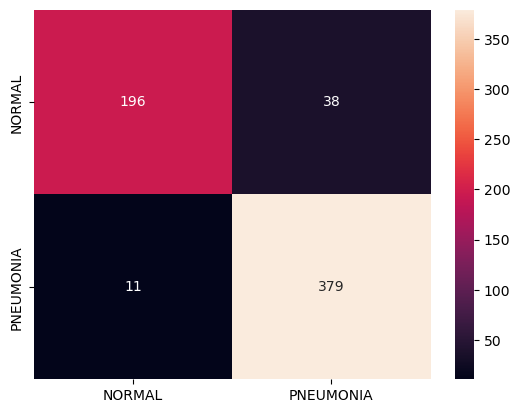

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt
report = classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA'])
with open('classification_report.txt','w') as f: f.write(report)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NORMAL','PNEUMONIA'], yticklabels=['NORMAL','PNEUMONIA'])
plt.savefig('confusion_matrix.png', bbox_inches='tight')


In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, ...)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [1]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns


In [5]:
# Adjust paths to your dataset
base_dir = r"D:\archive\chest_xray"
train_dir = base_dir + r"\train"
test_dir = base_dir + r"\test"


In [7]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", shuffle=False
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
model = models.Sequential([
    layers.Input(shape=(150,150,3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [11]:
history = model.fit(train_generator, epochs=10)


D:\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 107s 638ms/step - accuracy: 0.8255 - loss: 0.3805
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 797s 5s/step - accuracy: 0.9644 - loss: 0.0948
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 114s 691ms/step - accuracy: 0.9711 - loss: 0.0807
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 7274s 45s/step - accuracy: 0.9710 - loss: 0.0764
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 140s 850ms/step - accuracy: 0.9728 - loss: 0.0671
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 140s 853ms/step - accuracy: 0.9810 - loss: 0.0429
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 143s 869ms/step - accuracy: 0.9851 - loss: 0.0428
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 151s 918ms/step - accuracy: 0.9880 - loss: 0.0291
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 137s 832ms/step - accuracy: 0.9897 - loss: 0.0283
Epoch 10/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 148s 905ms/step - accuracy: 0.9935 - loss: 0.0190


In [13]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 645ms/step - accuracy: 0.7144 - loss: 1.6601
Test Accuracy: 0.8526


In [15]:
# Predictions
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)
y_true = test_generator.classes

# Metrics
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes)
rec = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=["Normal", "Pneumonia"]))

# Save metrics
metrics_df = pd.DataFrame([{
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1
}])
metrics_df.to_csv("evaluation_report.csv", index=False)


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 582ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.62      0.76       234
   Pneumonia       0.81      0.99      0.89       390

    accuracy                           0.85       624
   macro avg       0.90      0.81      0.83       624
weighted avg       0.88      0.85      0.84       624



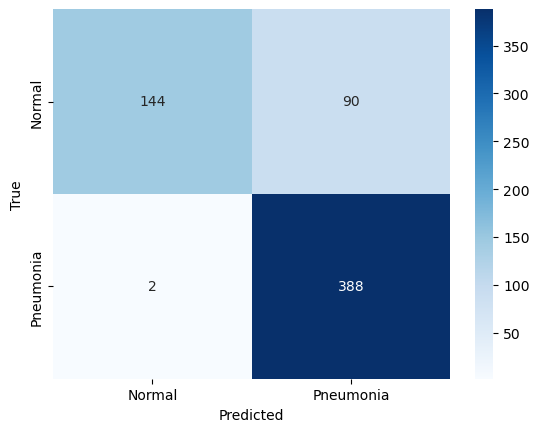

In [17]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [19]:
# Save the trained model
model.save("xray_cnn_model.h5")
print("Model saved as xray_cnn_model.h5")


Model saved as xray_cnn_model.h5


In [21]:
from tensorflow.keras.models import load_model

# Load model without retraining
model = load_model("xray_cnn_model.h5")
print("Model loaded successfully!")


Model loaded successfully!
